In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extract language and segment length from file name
files = glob.glob('./*_feature.txt')  # Adjust the path accordingly
data_list = []
for file in files:
    filename = os.path.basename(file)
    language, length, _ = filename.split('_')
    df = pd.read_csv(file, header=None, names=['vcratio', 'wvc', 'mwl', 'awl', 'mccl', 'accl', 'cp'])
    df['vcratio'] = pd.to_numeric(df['vcratio'].apply(lambda x: x.split(': ')[1] if ': ' in x else x))

    df['language'] = language
    df['length'] = int(length)
    data_list.append(df)

combined_data = pd.concat(data_list)

In [3]:
combined_data

,vcratio,wvc,mwl,awl,mccl,accl,cp,language,length
0,0.677419,2,11,5.20,2,1.380952,0.30,en,10
1,0.695652,4,9,4.30,2,1.352941,0.10,en,10
2,0.680000,2,10,4.20,3,1.388889,0.30,en,10
3,0.540541,2,15,5.70,4,1.681818,0.10,en,10
4,0.468750,1,10,5.10,3,1.777778,0.10,en,10
...,...,...,...,...,...,...,...,...,...
30457,0.701493,14,15,4.68,3,1.313725,0.06,nl,50
30458,0.653846,10,19,5.16,4,1.418182,0.32,nl,50
30459,0.743902,8,15,5.72,4,1.438596,0.08,nl,50
30460,0.708333,15,14,5.74,3,1.307087,0.22,nl,50


In [4]:
combined_data.describe()

,vcratio,wvc,mwl,awl,mccl,accl,cp,length
count,5.314481e+06,5.314481e+06,5.314481e+06,5.314481e+06,5.314481e+06,5.314481e+06,5.314481e+06,5.314481e+06
mean,7.114785e-01,6.669839e+00,1.229315e+01,5.252589e+00,3.200224e+00,1.423532e+00,2.594390e-01,1.896350e+01
std,1.245587e-01,5.683167e+00,3.352592e+00,7.915039e-01,8.814146e-01,1.290410e-01,1.405131e-01,9.960176e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.226415e-01,3.000000e+00,1.000000e+01,4.720000e+00,3.000000e+00,1.340000e+00,1.500000e-01,1.000000e+01
50%,7.000000e-01,5.000000e+00,1.200000e+01,5.200000e+00,3.000000e+00,1.414634e+00,2.500000e-01,2.000000e+01
75%,7.916667e-01,8.000000e+00,1.400000e+01,5.700000e+00,4.000000e+00,1.500000e+00,3.500000e-01,2.000000e+01
max,9.000000e+00,5.000000e+01,4.000000e+01,2.460000e+01,2.200000e+01,4.333333e+00,1.000000e+00,5.000000e+01


In [5]:
combined_data[combined_data['vcratio']  == float('inf')]

,vcratio,wvc,mwl,awl,mccl,accl,cp,language,length


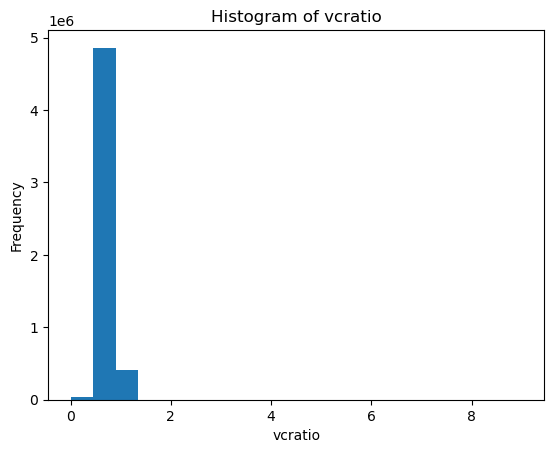

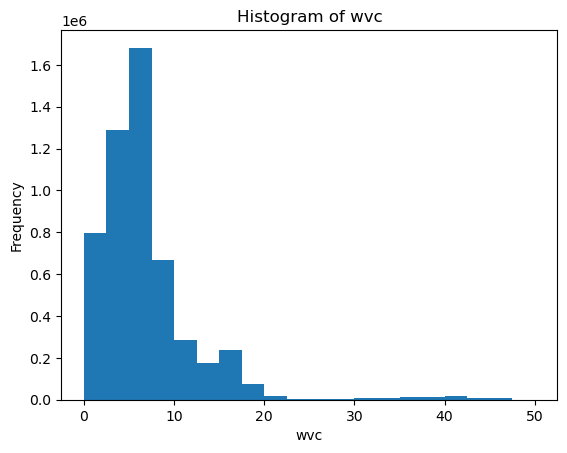

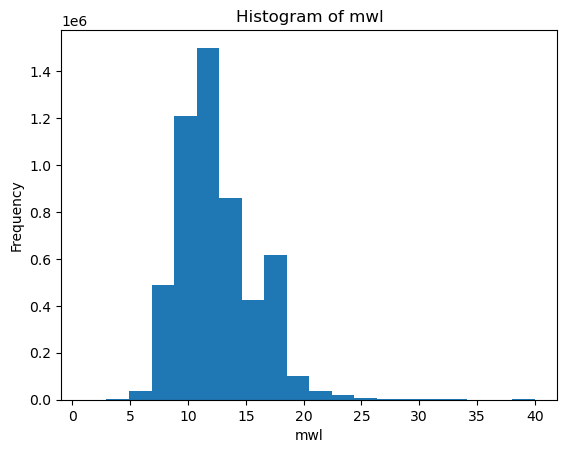

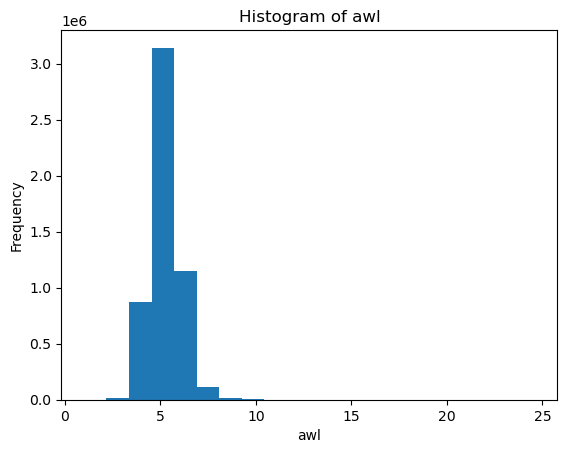

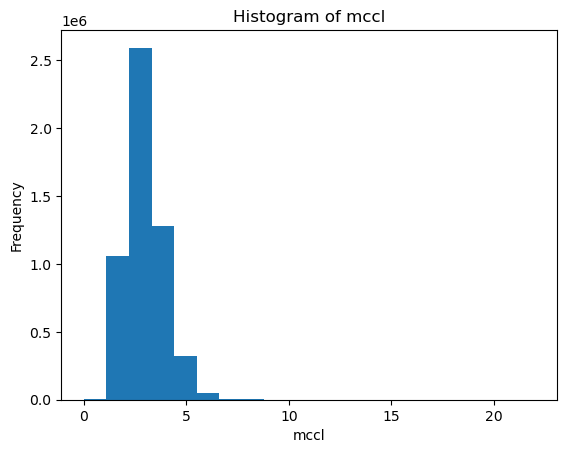

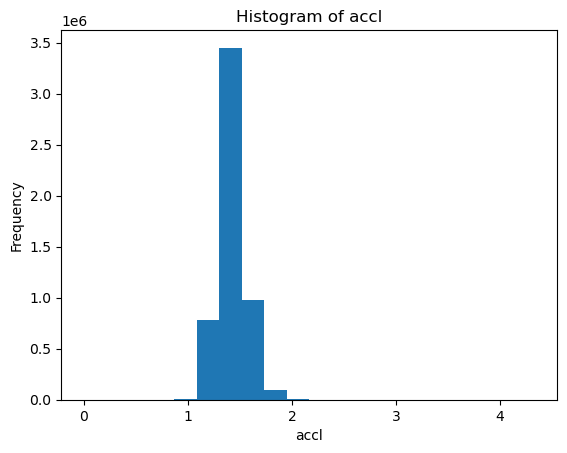

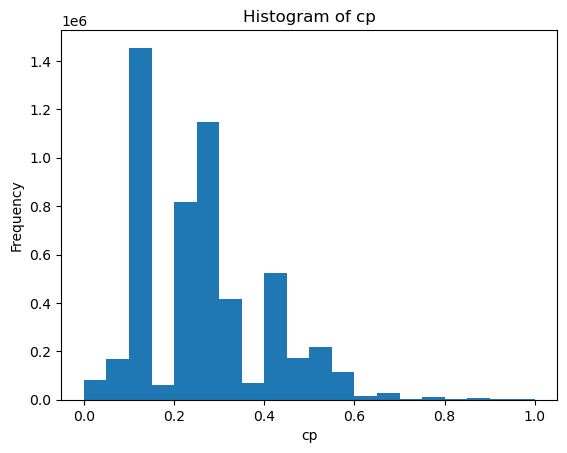

In [6]:
# Select columns to plot (exclude 'language' and 'length')
columns_to_plot = [col for col in combined_data.columns if col not in ['language', 'length']]

for column in columns_to_plot:
    plt.hist(combined_data[column], bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
combined_data[(combined_data['mwl'] > 30) & (combined_data['mwl'] <= 40)]

,vcratio,wvc,mwl,awl,mccl,accl,cp,language,length
598,0.590361,3,34,14.666667,6,1.844444,0.444444,en,10
2482,0.568966,2,31,10.333333,3,1.611111,0.555556,en,10
5683,0.146341,2,35,6.900000,3,1.500000,0.100000,en,10
7477,0.819672,4,38,11.500000,4,1.452381,0.600000,en,10
9526,0.682353,3,35,14.300000,5,1.666667,0.600000,en,10
...,...,...,...,...,...,...,...,...,...
28665,0.693750,10,33,5.440000,4,1.355932,0.240000,nl,50
28857,0.609091,12,31,7.160000,5,1.569343,0.300000,nl,50
29843,0.705128,17,32,5.360000,4,1.380531,0.160000,nl,50
30027,0.577778,8,37,5.980000,6,1.556522,0.280000,nl,50


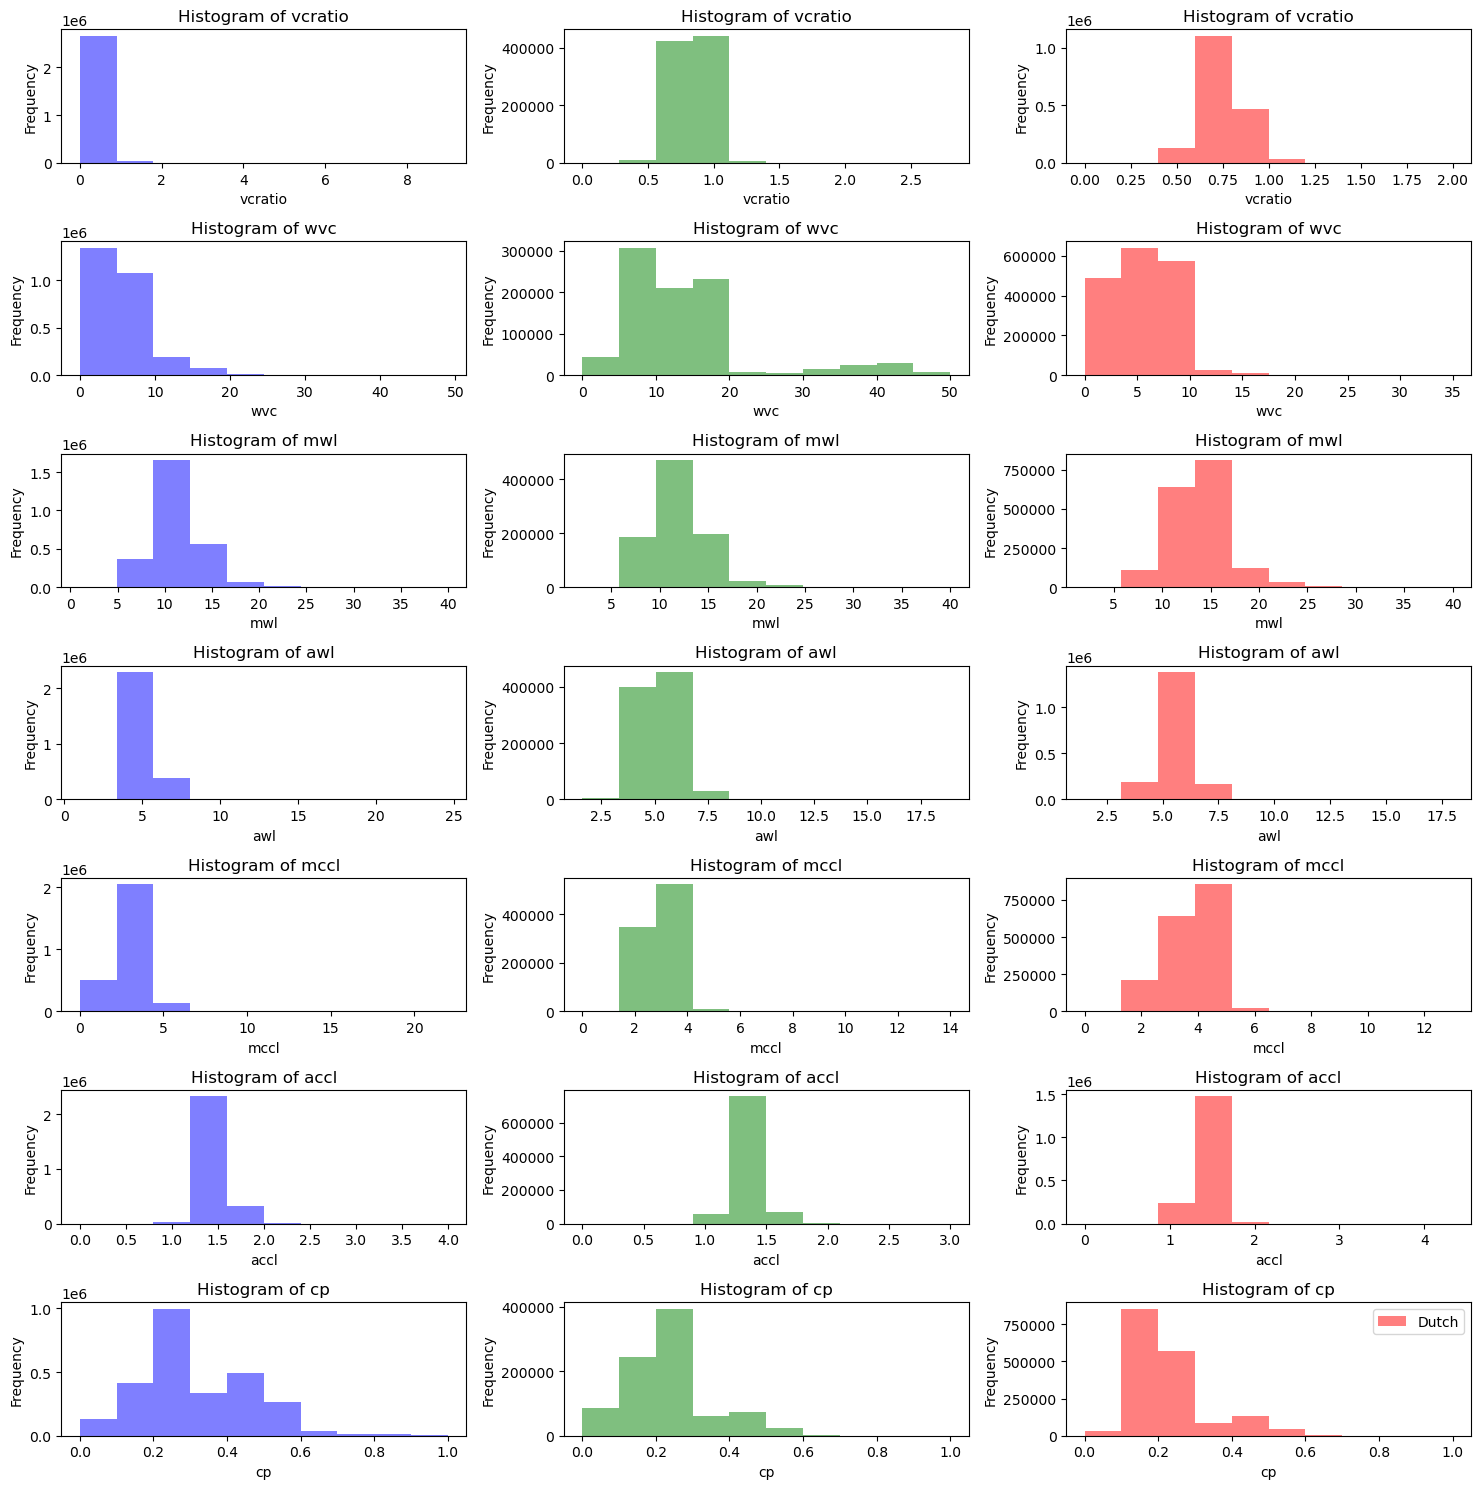

In [20]:
# Filter data for each language
english_data = combined_data[combined_data['language'] == 'en']
italian_data = combined_data[combined_data['language'] == 'it']
dutch_data = combined_data[combined_data['language'] == 'nl']

# Select columns to plot (exclude 'language' and 'length')
columns_to_plot = [col for col in combined_data.columns if col not in ['language', 'length']]

# Create subplots for side-by-side histograms
fig, axes = plt.subplots(len(columns_to_plot), 3, figsize=(15, 15))

for i, column in enumerate(columns_to_plot):
    axes[i, 0].hist(english_data[column], bins=10, alpha=0.5, color='b', label='English')
    axes[i, 1].hist(italian_data[column], bins=10, alpha=0.5, color='g', label='Italian')
    axes[i, 2].hist(dutch_data[column], bins=10, alpha=0.5, color='r', label='Dutch')

    for j in range(3):
        axes[i, j].set_title(f'Histogram of {column}')
        axes[i, j].set_xlabel(column)
        axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.legend()
plt.show()

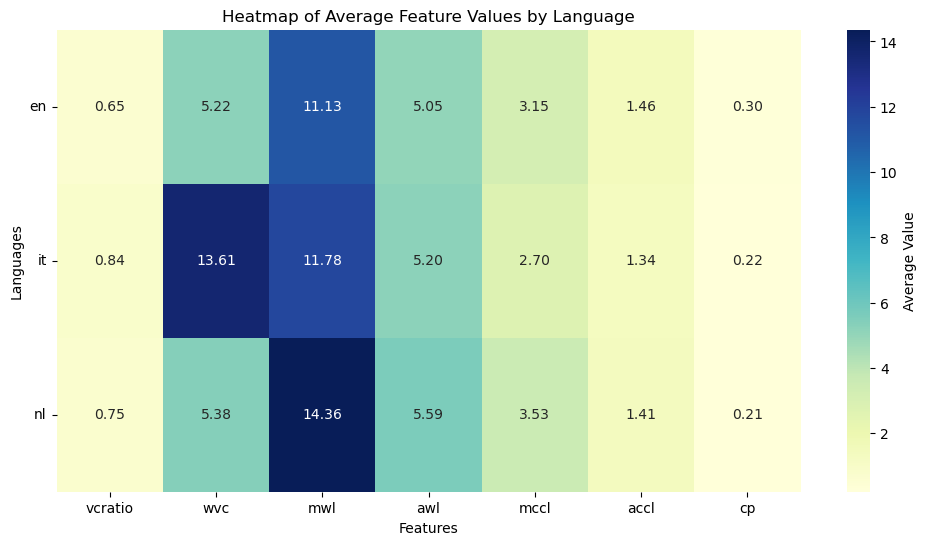

In [22]:
# Dropping the 'length' column from the analysis
data_without_length = combined_data.drop('length', axis=1)

# Calculate the mean of each feature for each language
feature_means_by_language = data_without_length.groupby('language').mean()

# Now, create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(feature_means_by_language, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Average Value'})
plt.title('Heatmap of Average Feature Values by Language')
plt.xlabel('Features')
plt.ylabel('Languages')
plt.yticks(rotation=0)  # Keep the language labels horizontal for readability
plt.show()